In [2]:
#import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('foodhub_order.xlsx')


In [20]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [6]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
# visualizing the shape of data set
df.shape

(1898, 9)

In [6]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
# visualizing the shape of data set
df.shape

(1898, 9)

In [8]:
# checking the datatypes of diffeent columns in data set, getting summary overview of the structure and missing values in data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [10]:
# checking only kind of dataset
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [12]:
# checking the missing values in data set.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

checked the data set and there is no missing values in data so no data cleaning or imputation is required..

In [13]:
# Checking the Statistical Summary of the data.
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

The statistical summary shows the minimum time taken to prepare food is 20 min, the maximum time is 35 min, the average time is 27.371

In [15]:
# checking the number of orders not rated
df['rating'].value_counts(dropna=False)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

To find the number of orders not rated , i have used 'value_counts() on the rating column with 'dropna = False'. This make sure all values which are missing or not given are counted. The output shows 736 orders were not rated, 588 orders were given No.5 rating, 386 were given No.4 ratings, 188 orders were given No.3 rating.

Exploratory Data Analysis (EDA)
Univariate Analysis

In [17]:
# check unique order ID
df['order_id'].nunique()

1898

The above command is used to identify the number of individual orders are placed i.e., 1898 and it helps to know about business metrics.

In [18]:
# check unique customer ID
df['customer_id'].nunique()

1200

In [ ]:
The above command shows frequently ordered customers which are 1200 in this data set.

<Axes: xlabel='customer_id'>

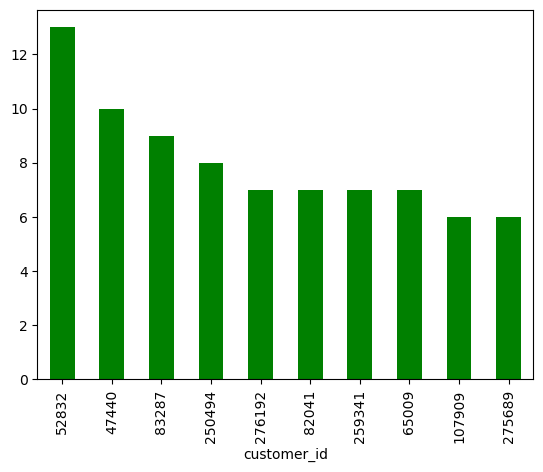

In [19]:
df['customer_id'].value_counts().head(10).plot(kind='bar', color='green')

The above graph shows the Top Ten Active Customers by order count. The x-axis shows the number of orders by customers and y-axis shows the customers ID. The customer ID 52832 shows 13 orders making him most active customer. Similarly moving towards right in the graph shows the decline in orders by respective customers ID. The EDA suggests marketing strategies for the company by looking into customer purchasing behaviour.

In [24]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

<Axes: xlabel='restaurant_name'>

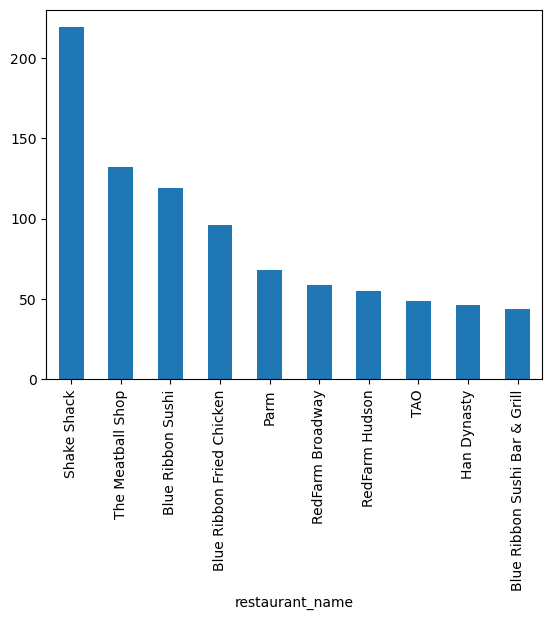

In [25]:
# create the bar chart to plot the top 10 restaurants
df['restaurant_name'].value_counts().head(10).plot(kind='bar')

The x-axis shows the restaurant name the y-axis shows the number of orders received by the restaurants. The highest number of orders are received by Shake Shack, followed by The meatball shop and and Blue Ribbon Sushi.

In [26]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

The number of unique cuisine type are 14.

<Axes: xlabel='cuisine_type', ylabel='count'>

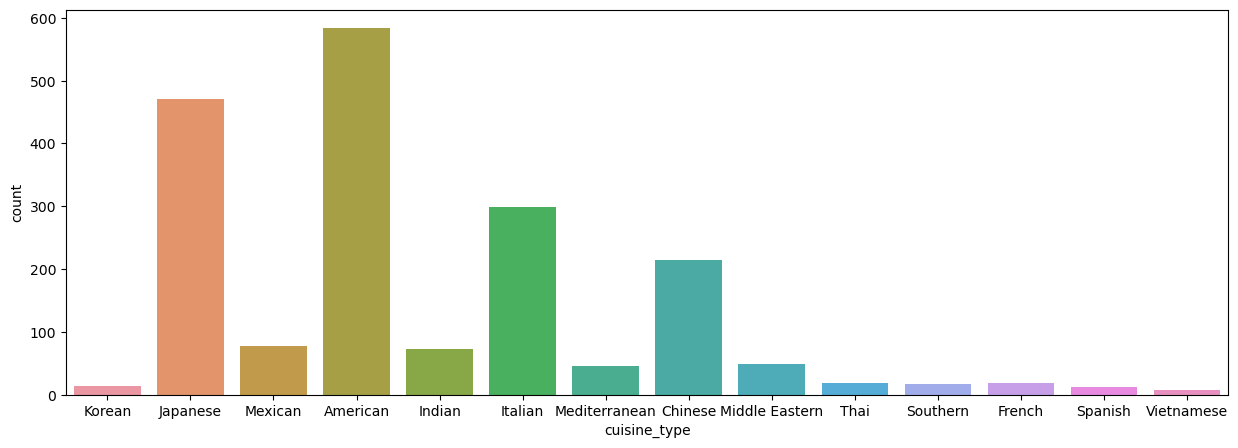

In [27]:
#Create a countplot for cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

The height of cuisine bar shows the demand by customers, the one with tallest height has more demand as compared to smaller. This will help the business to define marketing strategies and menu prioritization. The most demanding food order is by American Cuisine.

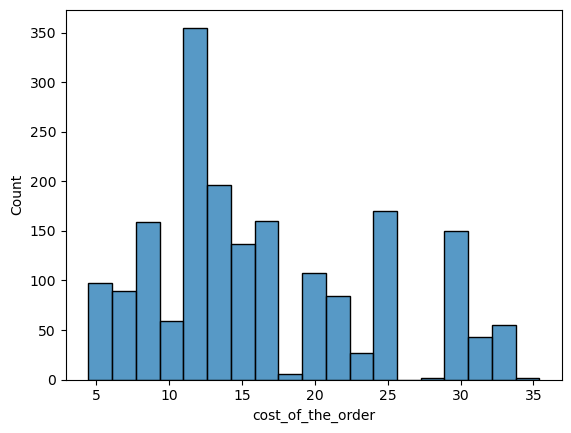

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()


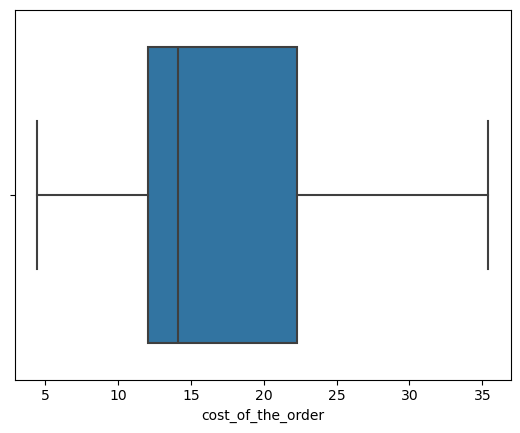

In [30]:
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [34]:
## Check the unique values
# Number of unique ratings
df['rating'].nunique()


4

In [35]:
# List of unique rating values
df['rating'].unique()

array(['Not given', 5, 3, 4], dtype=object)

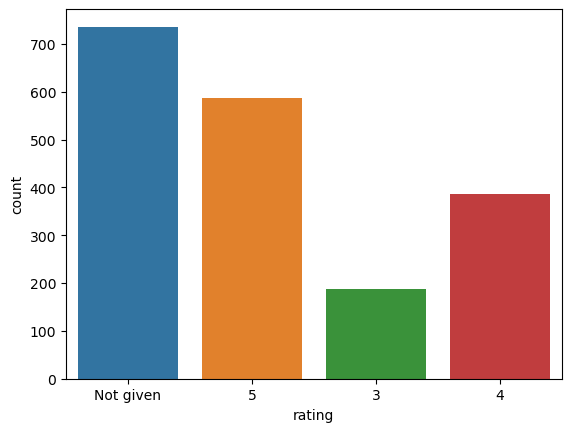

In [39]:
#Plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating')
plt.show()

The highest bar shows rating not given, the other ratings shows the business to improve service quality and other areas of improvement.

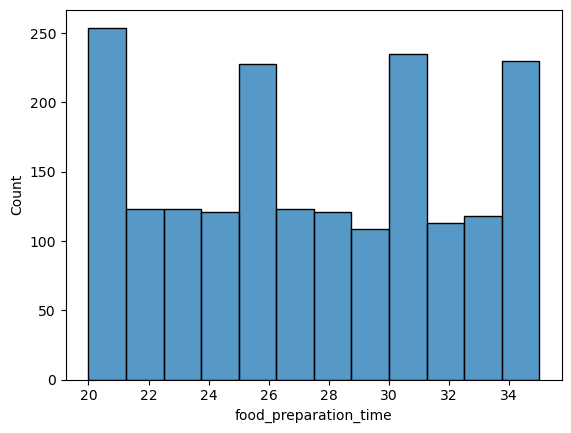

In [43]:
# Plot the histogram for the cost of order
sns.histplot(data=df,x='food_preparation_time')
plt.show()

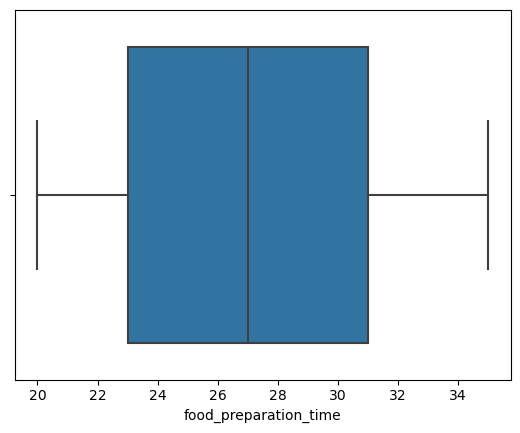

In [42]:
# Boxplot for the cost of order
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

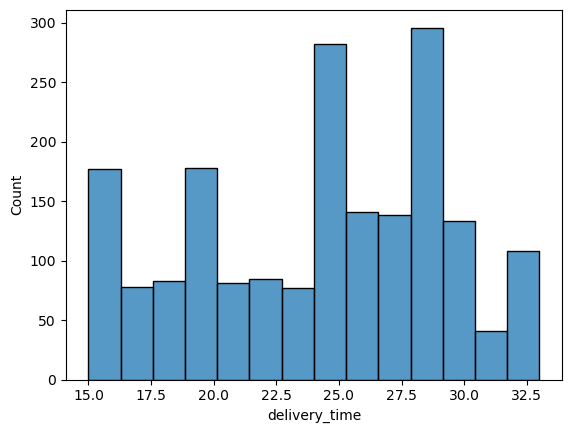

In [44]:
# Plot the histogram for the delivery time
sns.histplot(data=df,x='delivery_time')
plt.show

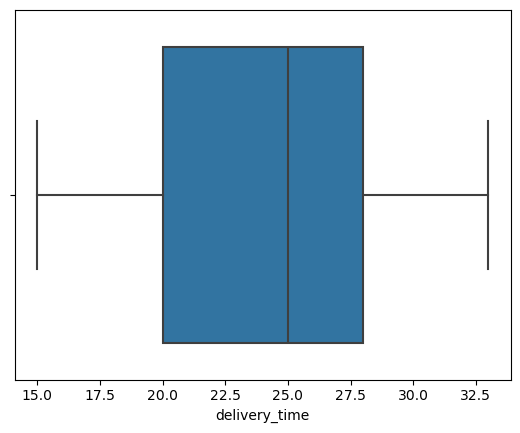

In [49]:
# Plot the boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()

In [48]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [50]:
# Get most popular cuisines on weekends
df_weekend = df[df['day_of_the_week']=='Weekend']
df_weekend['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

In [55]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:',df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')          


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [65]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [67]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

Multivariate Analysis

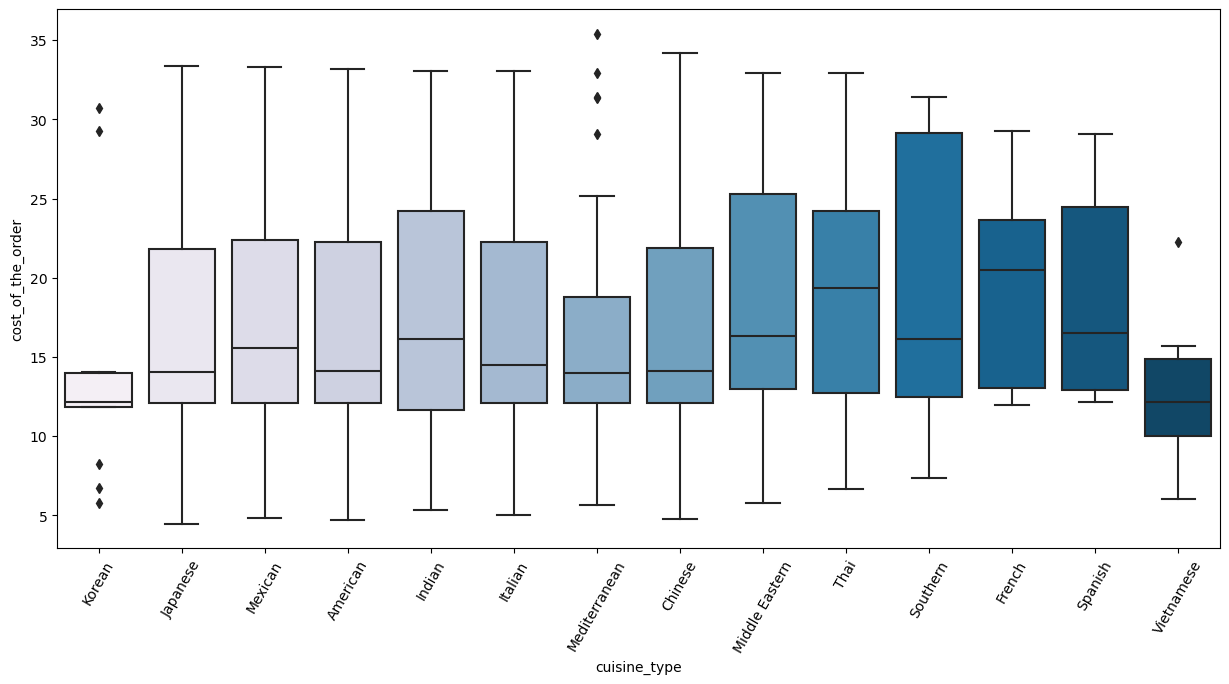

In [68]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

In the boxplot there is notable difference in pricing across cuisines. Southern and French cuisines have the highest median order costs, whereas Korean and Vietnamese cuisines have the lowest median prices. Thai, Southern, and Spanish cuisines have more cost ranges, their menu price is diverse with possib premium offers. In order to acheive maximum revenue potential, the menu pricing strategies with promotional offers can bring profits to businesses.

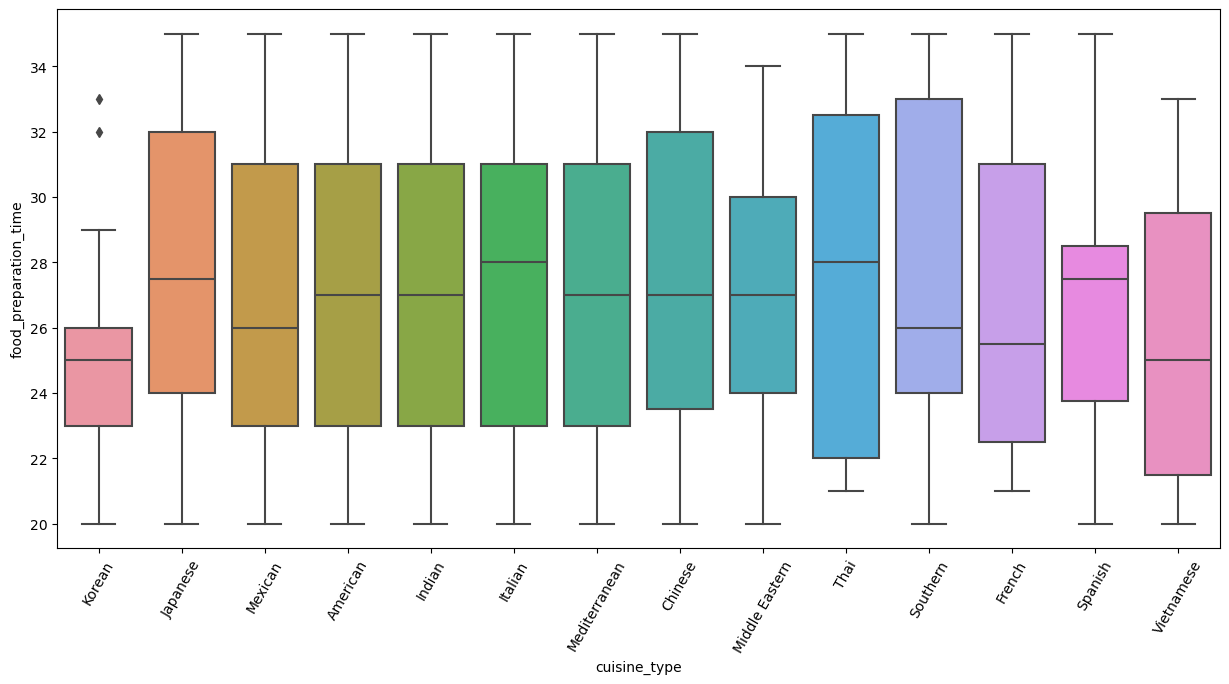

In [8]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y= "food_preparation_time", data=df) 
# Visualize the relationship between food preparation time and cuisine type using boxplot. 
plt.xticks(rotation=60)
plt.show()

The graph shows the cuisines with short and consistent preparation time as Korean are efficient during peak-hour efficiency, while cuisines with longer prep time may require optimized kitchen work flow.

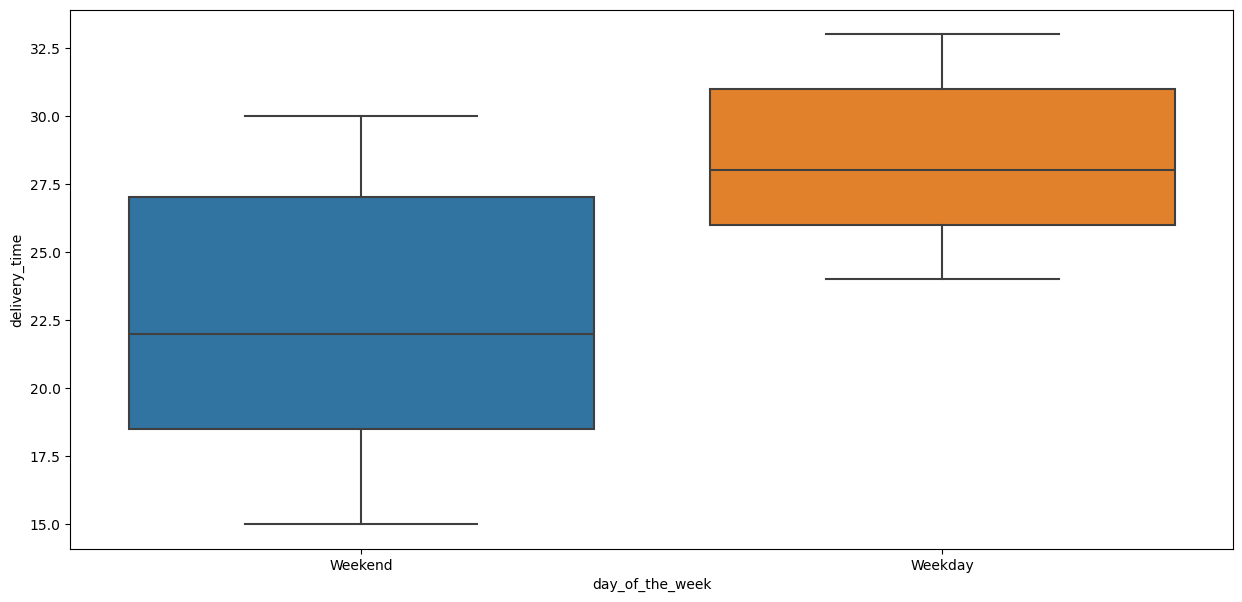

In [9]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df)
plt.show()

The boxplot shows that the weekeneds have slightly longer and more variable delivery times, while weekdays are more consistent.

In [11]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

A small group of restaurants generates the majority of total revenue, with Shake Shack leading significantly ahead of competitors. Premium dining spots and well-known chains, such as The Meatball Shop and Blue Ribbon Sushi, show strong revenue performance, while most other restaurants earn moderately in comparison.

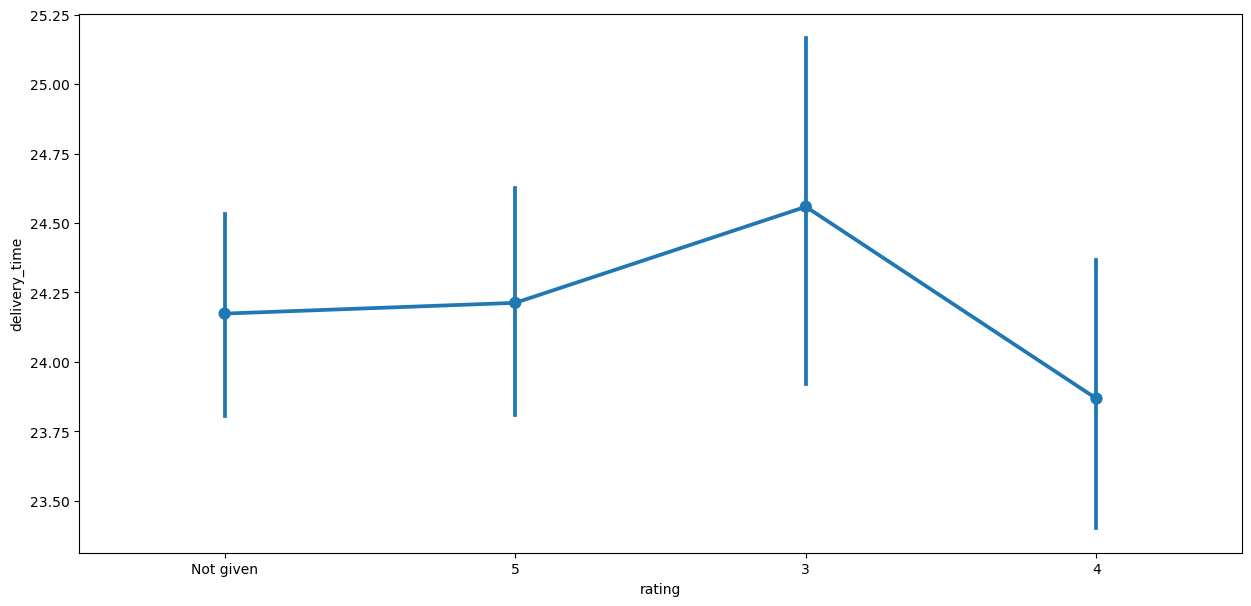

In [12]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

The point plot shows that the average delivery time remains almost consistent across different ratings, having minor variations. By looking at the graph, the delivery time does not seems to be a strong factor to effect customer rating.

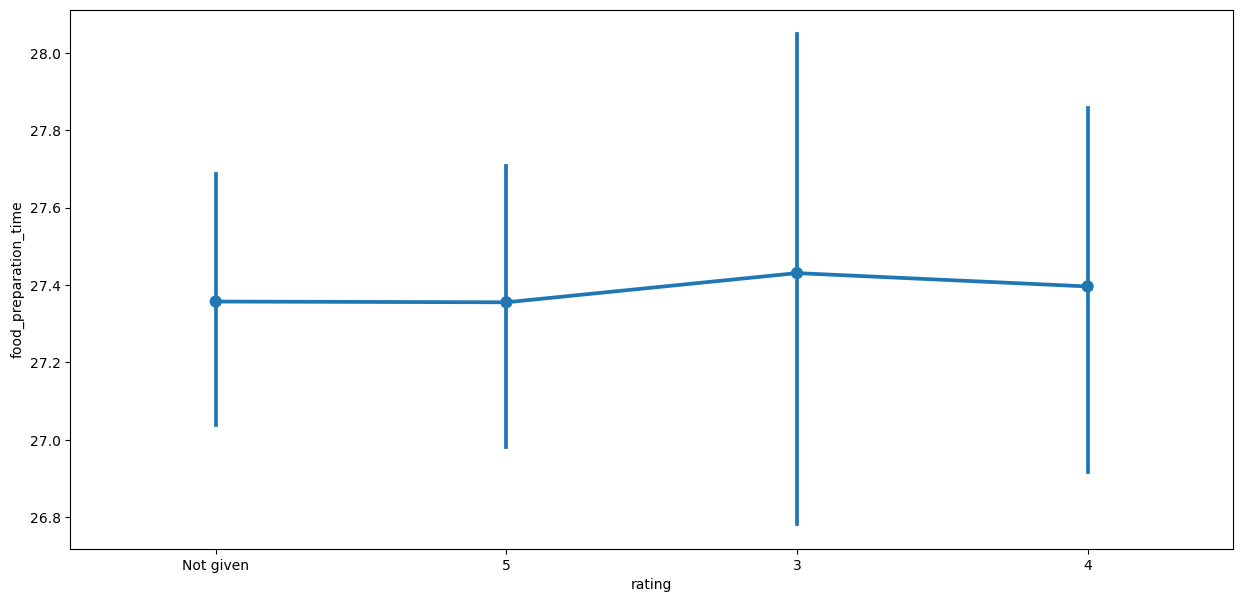

In [4]:
# Relationship between rating and food preparatio time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time',data=df)
plt.show()

The graph shows the minor variations, the small vertical lines shows the confidence interval reflecting the difference is not significant statistically. The food preparation time does not impact customer ratings.

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

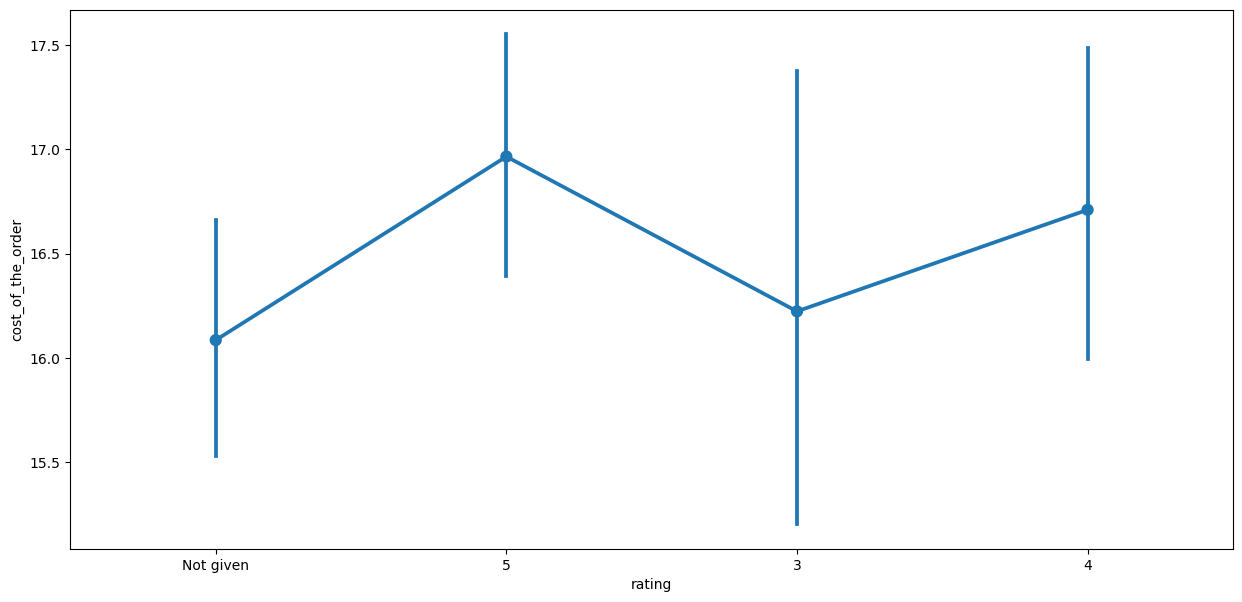

In [6]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15,7))
sns.pointplot(x="rating", y="cost_of_the_order", data=df)

Again the statistical difference is not much to impact the cost of order, hence the customer rating is not impacting the cost of order much.

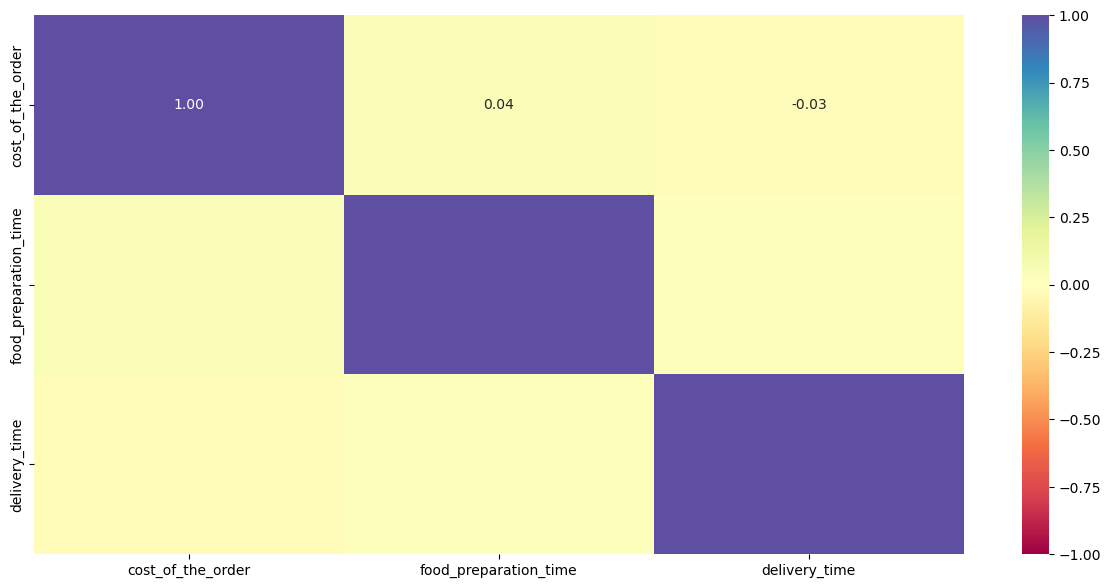

In [7]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
The Heatmap shows that there is not strong correaltion between three variables i.e., cost, preparation time, and the delivery time. hennce each variabel seems to be independent in the data set.

In [8]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


All restaurants in the list shows the rating above 50 except RedFarm Broadway.

In [11]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [14]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
# Write the appropriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [15]:
# Get the total revenue and print it
total_rev= df['Revenue'].sum()
print(' The net revenue is around',round(total_rev, 2), 'dollars')

 The net revenue is around 6166.3 dollars


In [19]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time']=df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders with total_time > 60 minutes
percentage_over_60 = (df[df['total_time'] > 60].shape[0]/ df.shape[0]) * 100

print('Percentage of orders taking more than 60 minutes:', round(percentage_over_60, 2), '%')

Percentage of orders taking more than 60 minutes: 10.54 %


In [23]:
# Mean delivery time on weekdays 
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean delivery time on weekdays is around', round(weekday_mean, 2), 'minute')

# Mean delivery time on weekend 
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time on weekend is around', round(weekend_mean, 2), 'minute')


The mean delivery time on weekdays is around 28.34 minute
The mean delivery time on weekend is around 22.47 minute


CONCLUSION
•    Net revenue: $6,166.30; top earner: Shake Shack ($703.61).
    •    American, Japanese, and Italian cuisines dominate in orders and revenue.
    •    Only 10.54% of orders exceed 60 min delivery time.
    •    Weekday delivery (28.34 min) is slower than weekend delivery (22.47 min).
    •    Four restaurants have >50 ratings and average rating >4.

RECOMMENDATIONS
 Promote top earners and high-rated restaurants in ads.
    •    Improve weekday delivery speed via route/staff optimization.
    •    Expand popular cuisines (American, Japanese, Italian).
    •    Encourage reviews for unrated/low-rated restaurants.
    •    Reduce >60 min deliveries to boost satisfaction.

In [24]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0.15

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
# Write the appropriate column name to compute revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [25]:
# Group by cuisine type and calculate total revenue
cuisine_revenue = df.groupby('cuisine_type')['Revenue'].sum().sort_values(ascending=False)
# Display the results
print(cuisine_revenue)

cuisine_type
American          1880.4130
Japanese          1481.0765
Italian            966.8845
Chinese            690.7530
Mexican            257.4205
Indian             246.9940
Middle Eastern     193.5535
Mediterranean      136.3280
Thai                78.0525
French              76.1925
Southern            68.7535
Spanish             47.2365
Korean              33.3030
Vietnamese          15.7530
Name: Revenue, dtype: float64


In [26]:
# Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

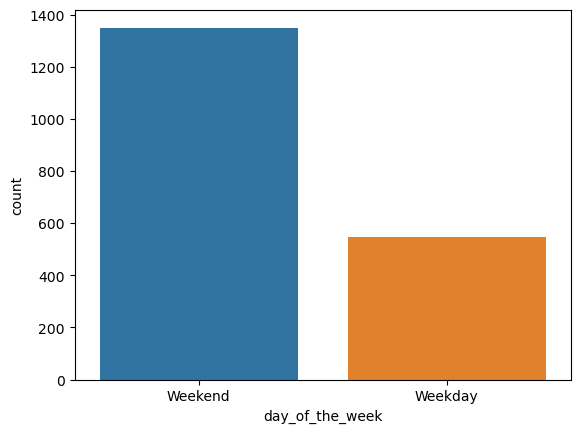

In [27]:
# Plot a bar graph for 'day_of_the_week' column
sns.countplot(data = df, x = 'day_of_the_week')